In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import ast
from sklearn.metrics import brier_score_loss

In [5]:
from sklearn.inspection import permutation_importance
datasets = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage1.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets.append((features_df, target_df))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores = []
model_importance1 = []

for train_index, test_index in kf.split(datasets):
    X_train = pd.concat([datasets[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets[i][1] for i in test_index], ignore_index=True)
    

    model = make_pipeline(
        SimpleImputer(strategy='constant', fill_value=0),
        MultiOutputClassifier(SVC(probability=True))  
    )
    
    model.fit(X_train, y_train)

    model_importance1.append(permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42))
    

    y_prob = model.predict_proba(X_test)
    
    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    brier_scores.append(brier_score)
    print(brier_score)


print(f'Stage 1 Average score across all folds: {np.mean(brier_scores)}')

0.05342723540996661
0.05335598395814166
0.04674625748498233
0.05307851699782573
0.05656830182655096
Stage 1 Average score across all folds: 0.05263525913549346


In [21]:
importance_df1 = pd.DataFrame()
importance_df1['features'] = pd.read_csv('../train/00001/train_stage1.csv').drop('target_vector', axis=1).columns

counter1 = 1
for i in range(len(model_importance1)):
    col_name = 'fit '+str(counter1)
    importance_df1[col_name] = model_importance1[i].importances_mean
    counter1 += 1

importance_df1['mean'] = importance_df1.drop('features', axis=1).mean(axis=1)
importance_df1 = importance_df1.sort_values(by='mean')
importance_df1['mean'] = importance_df1['mean'] / importance_df1['mean'].sum()
importance_df1

,features,fit 1,fit 2,fit 3,fit 4,fit 5,mean
0,start,0.0,0.0,0.0,0.0,0.0,NaN
1,end,0.0,0.0,0.0,0.0,0.0,NaN
2,location_idx,0.0,0.0,0.0,0.0,0.0,NaN
3,x_mean,0.0,0.0,0.0,0.0,0.0,NaN
4,y_mean,0.0,0.0,0.0,0.0,0.0,NaN
5,z_mean,0.0,0.0,0.0,0.0,0.0,NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


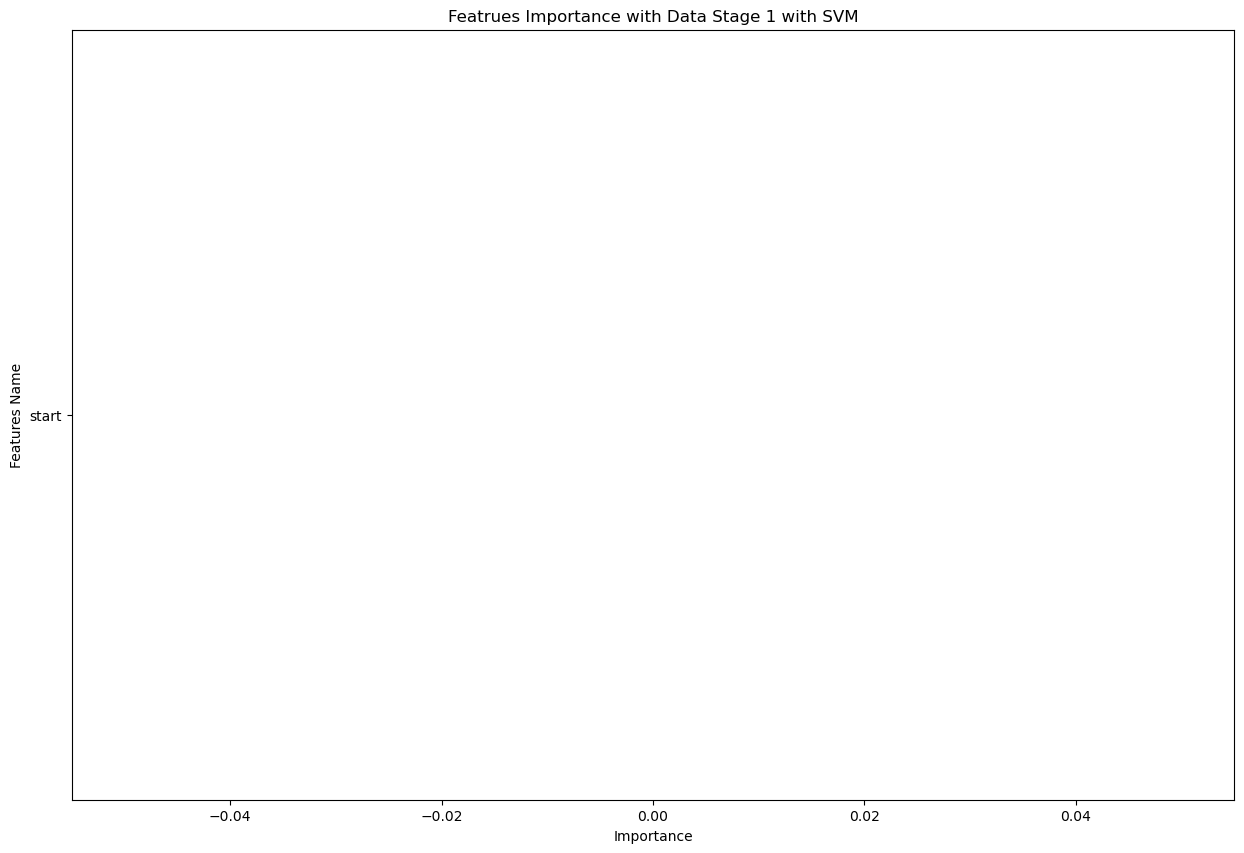

In [22]:
import matplotlib.pyplot as plt

colors = ['#f3766d' if v < 0 else '#6f94cd' for v in importance_df1['mean']]

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.barh(importance_df1['features'], importance_df1['mean'], color=colors, height=0.5)
ax1.set_ylabel('Features Name')
ax1.set_xlabel('Importance')
ax1.set_title('Featrues Importance with Data Stage 1 with SVM')

for index, value in enumerate(importance_df1['mean']):
    ax1.text(value, index, str(round(value, ndigits=4)))

plt.show()

In [10]:
datasets = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage2.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets.append((features_df, target_df))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores = []
model_importance2 = []

for train_index, test_index in kf.split(datasets):
    X_train = pd.concat([datasets[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets[i][1] for i in test_index], ignore_index=True)
    

    model = make_pipeline(
        SimpleImputer(strategy='constant', fill_value=0),
        MultiOutputClassifier(SVC(probability=True))  
    )
    
    model.fit(X_train, y_train)

    model_importance2.append(permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42))
    

    y_prob = model.predict_proba(X_test)
    
    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    brier_scores.append(brier_score)
    print(brier_score)


print(f'Stage 2 Average score across all folds: {np.mean(brier_scores)}')

0.034355053515924286
0.031910303364799955
0.034042946148034776
0.03233785554453862
0.031668570149188155
Stage 2 Average score across all folds: 0.03286294574449716


In [25]:
importance_df2 = pd.DataFrame()
importance_df2['features'] = pd.read_csv('../train/00001/train_stage2.csv').drop('target_vector', axis=1).columns

counter2 = 1
for i in range(len(model_importance2)):
    col_name = 'fit '+str(counter2)
    importance_df2[col_name] = model_importance2[i].importances_mean
    counter2 += 1

importance_df2['mean'] = importance_df2.drop('features', axis=1).mean(axis=1)
importance_df2 = importance_df2.sort_values(by='mean')
importance_df2['mean'] = importance_df2['mean'] / importance_df2['mean'].sum()
importance_df2


,features,fit 1,fit 2,fit 3,fit 4,fit 5,mean
6,Study_AP,-0.000664,0.000000e+00,-0.000440,0.000978,-0.003452,-0.001712
15,3d_movement_std_y,0.000664,-9.548059e-04,-0.000628,0.000214,-0.000230,-0.000448
17,2d_shape_mean_width,0.000231,-8.274984e-04,-0.000377,-0.000122,0.000197,-0.000430
19,2d_shape_std_width,0.000058,0.000000e+00,-0.000189,0.000000,0.000000,-0.000063
8,2d_movement_mean_y,-0.000202,-2.864418e-04,-0.000346,0.000611,0.000099,-0.000059
20,2d_shape_std_height,0.000087,6.365372e-05,-0.000220,0.000000,0.000000,-0.000033
26,x_mean,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
31,x_median,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
32,x_std_dev,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
33,x_max_value,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


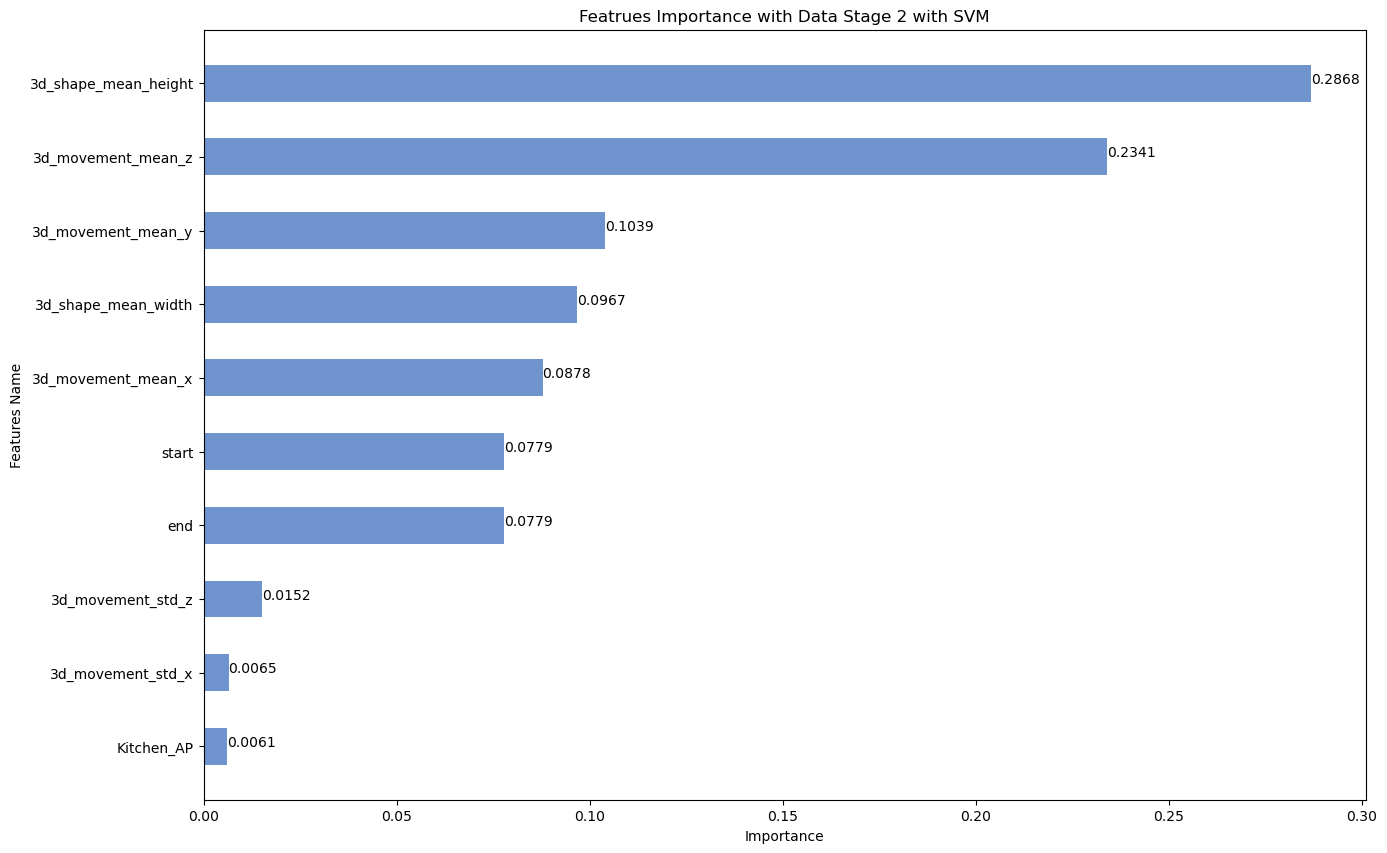

In [26]:
import matplotlib.pyplot as plt

colors = ['#f3766d' if v < 0 else '#6f94cd' for v in importance_df2['mean'].tail(10)]

fig, ax2 = plt.subplots(figsize=(15,10))

ax2.barh(importance_df2['features'].tail(10), importance_df2['mean'].tail(10), color=colors, height=0.5)
ax2.set_ylabel('Features Name')
ax2.set_xlabel('Importance')
ax2.set_title('Featrues Importance with Data Stage 2 with SVM')

for index, value in enumerate(importance_df2['mean'].tail(10)):
    ax2.text(value, index, str(round(value, 4)))

plt.show()

In [ ]:
datasets = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage3.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets.append((features_df, target_df))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores = []
model_importance3 = []

for train_index, test_index in kf.split(datasets):
    X_train = pd.concat([datasets[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets[i][1] for i in test_index], ignore_index=True)
    

    model = make_pipeline(
        SimpleImputer(strategy='constant', fill_value=0),
        MultiOutputClassifier(SVC(probability=True))  
    )
    
    model.fit(X_train, y_train)

    model_importance3.append(permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42))
    

    y_prob = model.predict_proba(X_test)
    
    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    brier_scores.append(brier_score)
    print(brier_score)


print(f'Stage 3 Average score across all folds: {np.mean(brier_scores)}')

In [14]:
importance_df3 = pd.DataFrame()
importance_df3['features'] = pd.read_csv('../train/00001/train_stage3.csv').drop('target_vector', axis=1).columns

counter3 = 1
for i in range(5,10):
    print(i)
    col_name = 'fit '+str(counter3)
    importance_df3[col_name] = model_importance2[i].importances_mean
    counter3 += 1

importance_df3['mean'] = importance_df3.drop('features', axis=1).mean(axis=1)
importance_df3 = importance_df3.sort_values(by='mean')
importance_df3['mean'] = importance_df3['mean'] / importance_df3['mean'].sum()
importance_df3


0
1
2
3
4


,features,fit 1,fit 2,fit 3,fit 4,fit 5,mean
0,start,0.0,0.0,0.0,0.0,0.0,NaN
28,x_average_jerk,0.0,0.0,0.0,0.0,0.0,NaN
29,x_average_absolute_value,0.0,0.0,0.0,0.0,0.0,NaN
30,x_median,0.0,0.0,0.0,0.0,0.0,NaN
31,x_std_dev,0.0,0.0,0.0,0.0,0.0,NaN
32,x_max_value,0.0,0.0,0.0,0.0,0.0,NaN
33,x_min_value,0.0,0.0,0.0,0.0,0.0,NaN
34,x_max_absolute_value,0.0,0.0,0.0,0.0,0.0,NaN
35,y_average_jerk,0.0,0.0,0.0,0.0,0.0,NaN
36,y_average_absolute_value,0.0,0.0,0.0,0.0,0.0,NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


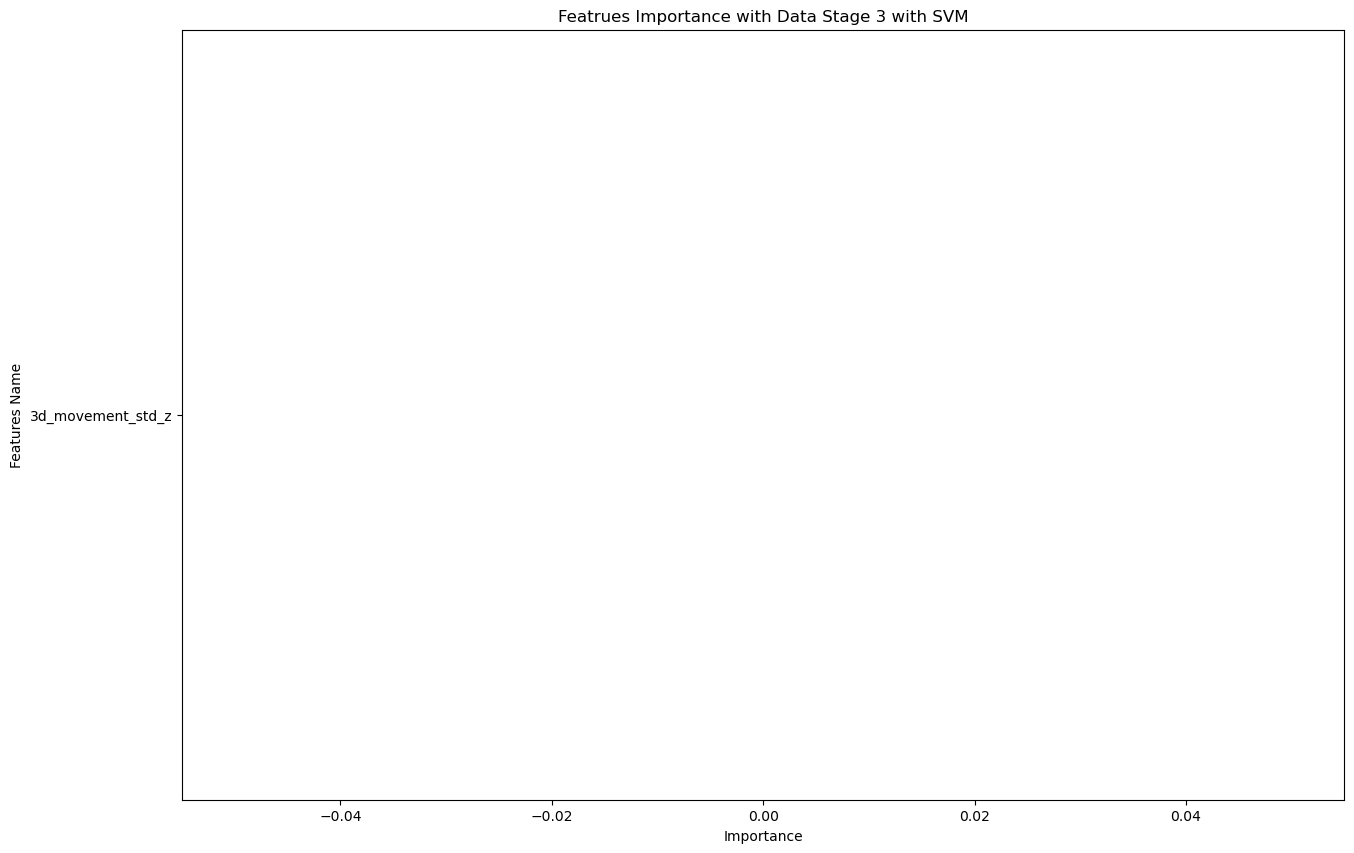

In [15]:
import matplotlib.pyplot as plt

colors = ['#f3766d' if v < 0 else '#6f94cd' for v in importance_df3['mean'].tail(10)]

fig, ax3 = plt.subplots(figsize=(15,10))

ax3.barh(importance_df3['features'].tail(10), importance_df3['mean'].tail(10), color=colors, height=0.5)
ax3.set_ylabel('Features Name')
ax3.set_xlabel('Importance')
ax3.set_title('Featrues Importance with Data Stage 3 with SVM')

for index, value in enumerate(importance_df3['mean'].tail(10)):
    ax3.text(value, index, str(round(value, ndigits=4)))

plt.show()